## 📥 Load & Preview Data
This section imports the necessary libraries and loads the LA Crime dataset into a Pandas DataFrame. We also preview the first few rows to understand the structure and types of features we’ll be working with.

In [339]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
crime = pd.read_csv("C:/Users/brimm/OneDrive/Desktop/Data for Python Course/Crime_Data_from_2020_to_Present.csv")

## 🧹 Data Cleaning & Preparation
In this section, we inspect column data types, handle missing values, convert date columns to datetime format, and create new time-based features like year and month.

### 📌 Preview the Dataset
- Code: crime.head()
- Provides a quick look at the first 5 rows of the dataset to understand the structure and content.

In [342]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


### 📌 View Column Names
- Code: crime.columns
- Lists all the column names in the dataset to assess what features are available.

In [344]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

### 📌 Check Dataset Size
- Code: crime.shape
- Displays the number of rows and columns. This dataset contains 852,950 records and 27 columns.

In [346]:
crime.shape

(852950, 27)

### 📌 View Data Types
- Code: crime.dtypes
- Identifies data types for each column to determine what needs to be converted (e.g., dates).

In [348]:
crime.dtypes #change date objects to datetime, for calculations

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

### 📌 Check for Missing Values
- Code: crime.isna().sum()
- Counts the number of missing (NaN) values in each column to prepare for data cleaning.

In [350]:
#Check Nulls
crime.isna().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

### 🧹 Drop Unnecessary Columns
- Code: df = crime.drop(...)
- Removes columns that are not relevant to the analysis for a cleaner dataset.

In [352]:
#Get rid of nulls for proper calculations
df = crime.drop(labels = ['modus_operandi','cross_street','weapon_code','weapon_description',
                          'crime_code_2','crime_code_3','crime_code_4'], axis = 1)

### 📌 Sort by Report Date
- Code: df.sort_values(by='date_reported')
- Sorts the dataset by the date the crimes were reported.

In [354]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,M,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,M,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,M,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,F,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,NaN,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,NaN,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973


### 📌 Review Updated Data Types
- Code: df.dtypes
- Re-checks data types to confirm successful conversion of date columns.

In [356]:
df.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
status                  object
status_description      object
crime_code_1           float64
location                object
latitude               float64
longitude              float64
dtype: object

### 📅 Convert Reported Date to DateTime
- Code: df['date_reported'] = pd.to_datetime(...)
- Changes date_reported from object to datetime for easier date-based analysis.

In [358]:
df['date_reported'] = pd.to_datetime(df['date_reported'], format ='%Y-%m-%d')


### 📊 Dataset Summary
- Code: df.info()
- Gives a concise summary including non-null counts and data types.

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  object        
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

### 📅 Convert Occurrence Date
Code: df['date_occurred'] = pd.to_datetime(...)
Converts the date_occurred column to datetime, which will be used for trend analysis.

In [362]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'], format = 'mixed')

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  datetime64[ns]
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

### 📊 Describe Numeric Columns
- Code: df.describe(include=['float64', 'int64'])
- Displays basic stats like mean, min, max, and standard deviation for numeric features.

In [365]:
df.describe(include=['float64', 'int64']) #shows numerics

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


### 📌 Analyze Victim Age
- Code: df['victim_age'].value_counts()
- Shows how frequently each age appears in the victim_age column.

In [367]:
df['victim_age'].value_counts()

victim_age
 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

### 🧼 Filter Invalid Ages
- Code: df_age = df[df['victim_age'] > 0]
- Filters out records with invalid (zero or negative) ages for accurate analysis.

In [369]:
df_age = df[df['victim_age'] > 0] #Filting out ages less than 0

### 📊 Victim Age Distribution
- Code: df_age['victim_age'].value_counts().reset_index()
- Counts valid ages and resets index to make the output easier to visualize or export.

In [371]:
df_age['victim_age'].value_counts().reset_index()

,victim_age,count
0,30,19421
1,35,19008
2,31,18603
3,29,18552
4,28,18266
...,...,...
94,95,89
95,96,88
96,98,67
97,97,63


### 📅 Add Year Column
- Code: df['year'] = df['date_occurred'].dt.year
- Creates a new column year from the occurrence date to enable yearly trend analysis.

In [373]:
df['year'] = df['date_occurred'].dt.year  #Cleaning up data more, by adding date columns for better calculations

df['month'] = df['date_occurred'].dt.month

In [375]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,...,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525,2020
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,...,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684,2020
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,...,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796,2020
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,...,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652,2020
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,...,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,...,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439,2023
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,...,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477,2023
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,...,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017,2023
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,...,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973,2023


### 📊 Now Let’s Run Some Analysis
- Now that our dataset is clean and prepped, we can begin exploring some trends and patterns in the crime data. We'll start by analyzing how crimes are distributed across different months throughout the dataset.

### 📌 Monthly Crime Frequency
- Code: df['month'].value_counts().sort_index().plot()
- Visualizes the number of crimes that occurred in each month across the dataset. This can help identify seasonal or periodic trends in crime activity.

In [377]:
df['month'] = df['date_occurred'].dt.month

### 📈 Crimes Per Month

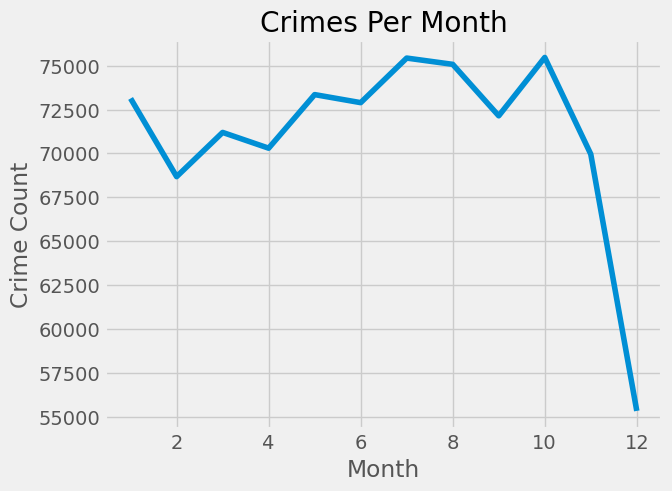

In [379]:
df['month'].value_counts().sort_index().plot()
plt.title('Crimes Per Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

### 🔍 Insight:

There is a noticeable drop in reported crimes during the month of December, likely due to incomplete or limited data for that period in 2023.


### 📅 Yearly Crime Trends
Now let’s take a look at how reported crime counts have changed over the years. This will help us spot any long-term increases, decreases, or unusual patterns in yearly crime activity.

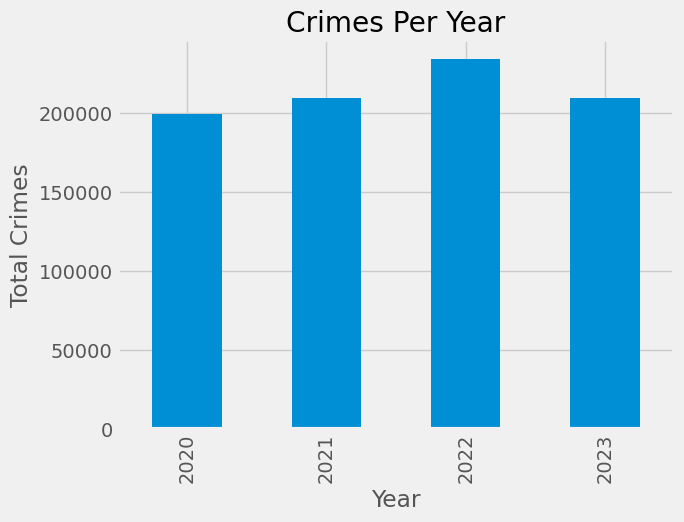

In [382]:
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()

### 🔍 Insight:

Crime counts remained relatively consistent between 2019 and 2022, with a slight peak in 2022. This suggests a steady trend over the years, though 2023 appears lower due to incomplete data collection.

### 📈 Crimes Per YearMonth (Cleaned for December 2023 Bias)

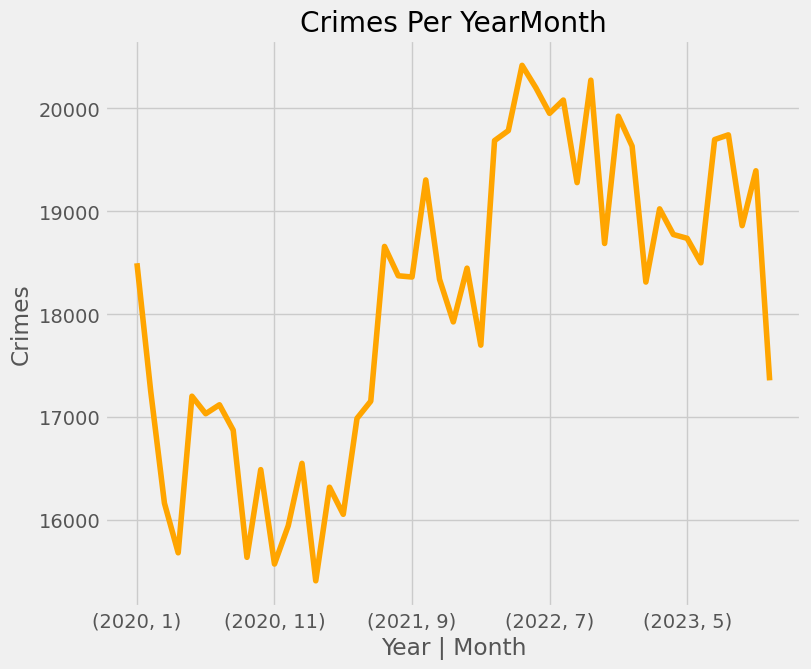

In [385]:
# Excluding December 2023 due to incomplete data
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

# Styled and resummarized plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 7))
df.groupby(['year', 'month']).size().plot(color='orange')
plt.title('Crimes Per YearMonth')
plt.ylabel('Crimes')
plt.xlabel('Year | Month')
plt.show()

### 🔍 Updated Insight:

After removing incomplete December 2023 data, the trendline presents a more accurate view of monthly crime volume. We can see steady activity across the years, with 2022 showing the highest reported crimes, and relatively consistent patterns across months.

### 👤 Victim Age Distribution
Now that we've explored trends over time, let’s shift focus to the age distribution of victims involved in reported crimes.

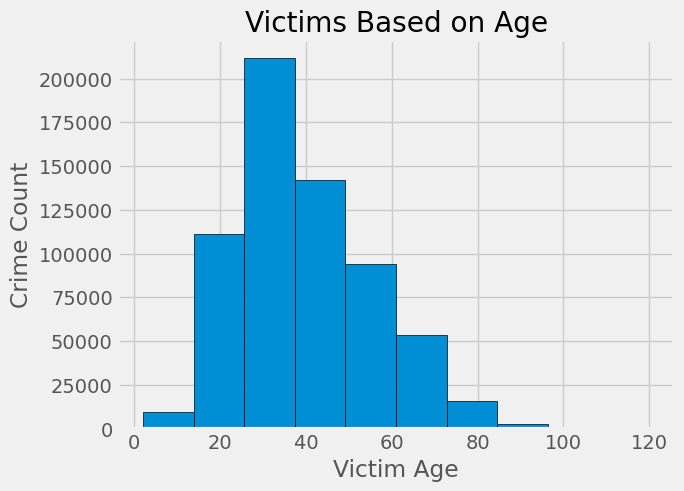

In [388]:
plt.hist(df_age['victim_age'], edgecolor='black')
plt.title('Victims Based on Age')
plt.xlabel('Victim Age')
plt.ylabel('Crime Count')
plt.show()

### 🔍 Insight:

The distribution shows that younger individuals (ages 18–30) are the most common victims of reported crimes. There is a noticeable decline in victim counts as age increases, with relatively fewer crimes reported among individuals over 60.

### 🔍 Most Common Crime Types

To identify which crimes occur most frequently, we’ll look at the top reported `crime_description` values. This helps us understand the nature of offenses that are most common across LA.

The code below displays the 10 most frequent crime types in the dataset.

In [391]:
df['crime_description'].value_counts().head(10)

crime_description
VEHICLE - STOLEN                                           91278
BATTERY - SIMPLE ASSAULT                                   67828
THEFT OF IDENTITY                                          53384
BURGLARY FROM VEHICLE                                      52507
BURGLARY                                                   51853
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51745
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48784
THEFT PLAIN - PETTY ($950 & UNDER)                         43339
INTIMATE PARTNER - SIMPLE ASSAULT                          42662
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32825
Name: count, dtype: int64

### 💡 Insight

The most commonly reported crime is Stolen Vehicle, followed by Battery Simple Assault. These types of incidents appear consistently across the dataset and could be useful focal points for public safety initiatives or further geographic analysis.

### 📅 Crime Frequency by Day

To better understand how frequently different crimes occur on a daily basis, we first created a new column called `date_occurred_no_time` which stores only the date (without the timestamp). This allows us to group crimes that happened on the same day, regardless of the specific time.

We then calculated the average number of daily reports per crime type to identify the most consistently reported offenses across the dataset.

# Extract only the date from datetime for accurate daily grouping

In [395]:
df.loc[:, 'date_occurred_no_time'] = df['date_occurred'].dt.date

# Count number of crimes by date and crime type

In [397]:
crime_count_per_day = df.groupby(['date_occurred_no_time', 'crime_description' ]).size() 

# Calculate the average daily occurrence for each crime type and find the top 20

In [399]:
top_20_crimes = crime_count_per_day.groupby(['crime_description']).mean()\
.reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

# Sort for horizontal bar chart visualization

In [401]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'average_daily_count', ascending = True)

### 📊 Top 20 Most Frequently Reported Crime Types (Daily Average)

This horizontal bar chart highlights the 20 most common crime types based on their average number of daily reports. These results reveal which types of incidents are consistently frequent across the city.

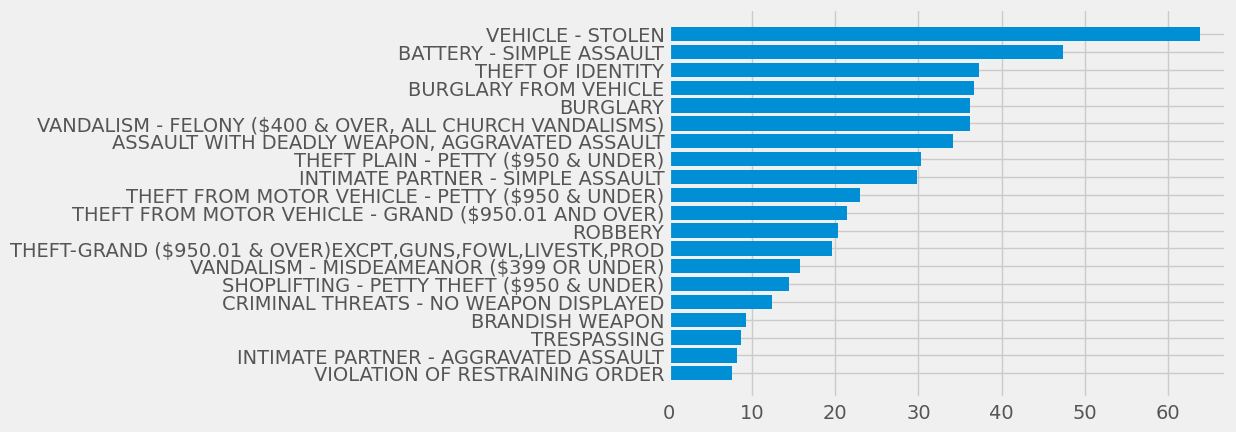

In [403]:
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'])
plt.show()

## 📊 Final Visual Summary of Key Crime Trends

To summarize our findings visually, we used Matplotlib’s plotting tools to create a set of clear, informative charts. This section brings together the key insights uncovered during our analysis, providing a quick overview of patterns in the LA crime dataset.

The following plots are styled using the `fivethirtyeight` theme and presented in a dashboard-style layout:

- **Top Left (Line Chart)**: Crime trends over time (by year and month)
- **Top Right (Histogram)**: Distribution of crimes by victim age
- **Bottom (Bar Chart)**: Top 20 most frequently reported crime types (daily average)

In [405]:
plt.style.available
plt.style.use('ggplot')

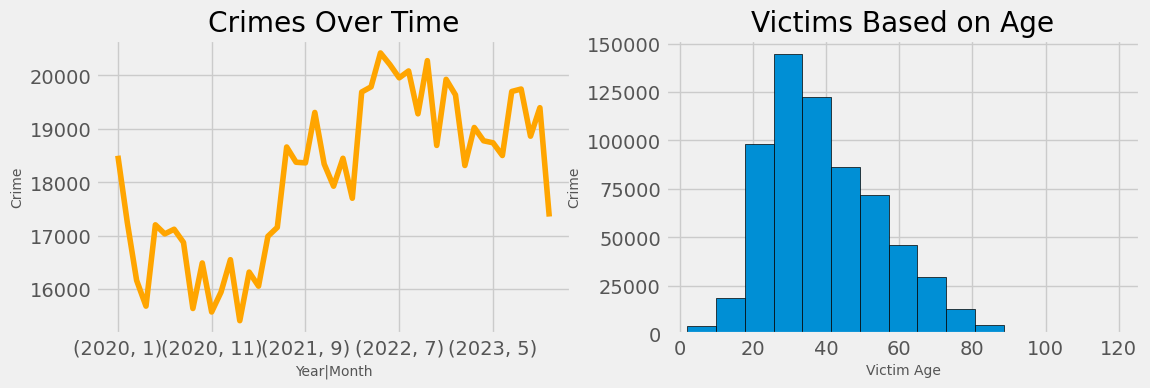

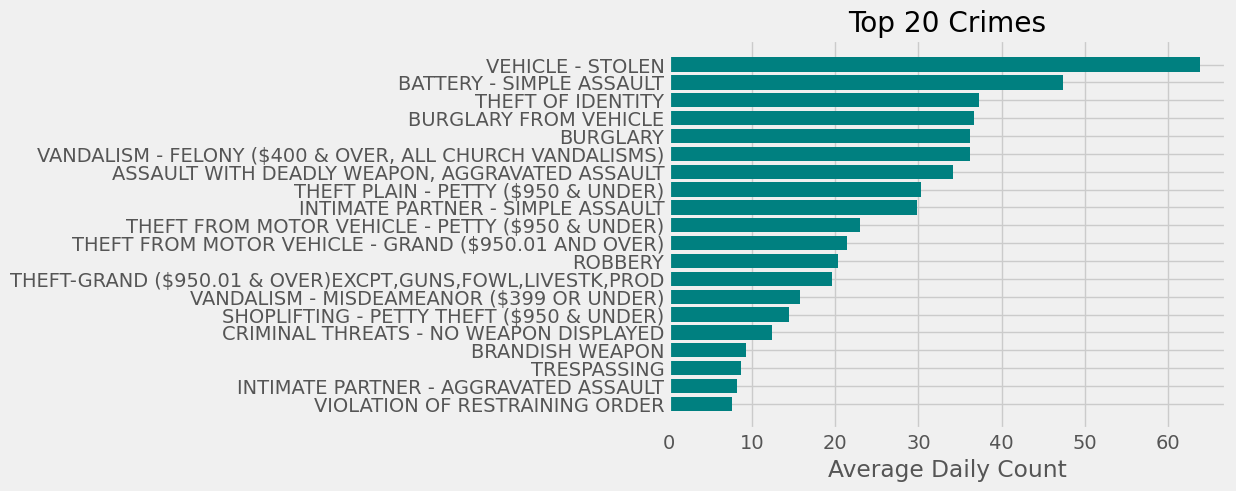

In [546]:
plt.style.available
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

#Plot 1 Line Chart
plt.subplot(2,2,1)
df.groupby(['year','month']).size().plot(color = 'orange')
plt.title('Crimes Over Time')
plt.ylabel('Crime', fontsize = 10) 
plt.xlabel('Year|Month', fontsize = 10)

# Plot 3 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)
plt.title('Victims Based on Age')
plt.xlabel('Victim Age', fontsize = 10)
plt.ylabel('Crime', fontsize = 10)
#Plot 2 = Bar Chart

plt.figure()
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'], color = 'teal')
plt.title('Top 20 Crimes')
plt.xlabel('Average Daily Count')

plt.show()

## 🕒 Reporting Delay Analysis
This section explores the time difference between when a crime occurred and when it was reported.

- We calculate the "Time to Report" in days by subtracting the crime occurrence date from the report date.
- This helps uncover which crimes take longer to be reported and may point to underreporting or delayed responses.

In [408]:
df.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01


🧮 Time to Report (Top 10 Delays by Frequency)

This displays the most common reporting delay durations—how many crimes were reported after a specific number of days. It provides a distribution of typical reporting delays.

In [410]:
df.loc[:,'Time to report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days


### 🧮 Most Frequent Reporting Delays
This shows the top 10 most common reporting delay durations (in days). Useful for understanding typical lag patterns in reports.

In [412]:
df['Time to report'].value_counts().head(10).reset_index()

,Time to report,count
0,0,419620
1,1,185029
2,2,52808
3,3,30894
4,4,19932
5,5,14416
6,6,10837
7,7,9722
8,8,7053
9,9,5660


### 🔍 Insight

The majority of crimes are reported on the **same day (0 days delay)** or **within 1 day** of the incident:

- **0 days delay** → 419,620 reports  
- **1 day delay** → 185,029 reports  

This suggests that a large portion of incidents are reported promptly, potentially reflecting either the severity or urgency of these crimes.

### 🕵️‍♂️ Crimes with the Longest Average Time to Report
This identifies crimes with the **highest average reporting delay**, which might indicate underreporting or low urgency in reporting.

In [415]:
df.groupby(['crime_description'])['Time to report'].mean().sort_values(ascending = False).head(10).reset_index()

,crime_description,Time to report
0,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,128.181013
1,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,123.779056
2,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",110.913921
3,LEWD/LASCIVIOUS ACTS WITH CHILD,97.324675
4,DISHONEST EMPLOYEE ATTEMPTED THEFT,87.000000
5,BIGAMY,77.666667
6,SEXUAL PENETRATION W/FOREIGN OBJECT,66.092946
7,ORAL COPULATION,62.078616
8,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",61.322581
9,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",59.657109


### 🔍 Insight

This identifies crimes with the **highest average reporting delay**, which may suggest underreporting, stigma, or lower perceived urgency.

**Top Delays:**

- **CRIMES AGAINST CHILDREN** → 128 days average delay  
- **SEX OFFENDER REGISTRATION** → 123 days  
- **UNLAWFUL SEXUAL INTERCOURSE** → 110 days  

These findings highlight crimes that may require more public outreach or procedural improvements to encourage timely reporting.

### 👴 Top 3 Crimes with the Oldest Average Victims

This block identifies which crimes have the **oldest victims on average**. This insight can help with targeted prevention or protection policies.

In [418]:
df_age.groupby('crime_description')['victim_age'].mean().reset_index().sort_values(by = 'victim_age', ascending = False).head(3)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000


### 🔍 Insight

This identifies which crimes tend to involve older victims on average:

**Top 3:**

- **DISHONEST EMPLOYEE ATTEMPTED THEFT**  
- **BLOCKING DOOR INDUCTION CENTER**  
- **LYNCHING**  

These categories may reflect crimes occurring in specific settings or affecting more vulnerable populations.

### 🌙 Nighttime Crimes by Area
We define nighttime as **8 PM to 3 AM**. This filters the dataset to those hours and shows the area with the **most crimes committed at night**.

In [421]:
#Find the area with the highest number of crimes occuring during nighttime
nighttime_crimes = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour <= 3)]

In [422]:
nighttime_crimes['area_name'].value_counts()

area_name
Central        18873
77th Street    17568
Hollywood      15741
Pacific        15328
Southwest      14819
Southeast      14638
Olympic        14256
Newton         13843
N Hollywood    13428
Rampart        13047
Wilshire       11665
Harbor         11623
Northeast      11379
West Valley    11351
West LA        11012
Van Nuys       10964
Mission        10813
Hollenbeck     10425
Devonshire     10172
Topanga        10104
Foothill        8745
Name: count, dtype: int64

🌃 We filtered crimes that occurred during nighttime hours (8 PM to 3 AM) to uncover where they’re most concentrated.

**Top 3 areas for nighttime crimes:**

1. **Central** – 18,873 incidents  
2. **77th Street** – 17,568 incidents  
3. **Hollywood** – 15,741 incidents  

These findings suggest that late-night incidents are more frequent in central urban zones, which may align with nightlife and high foot traffic areas.

### 🕐 Hourly Crime Count

This plots **total crimes per hour**, allowing us to visually inspect which hours are most dangerous or active.

In [425]:
hourly_crime = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

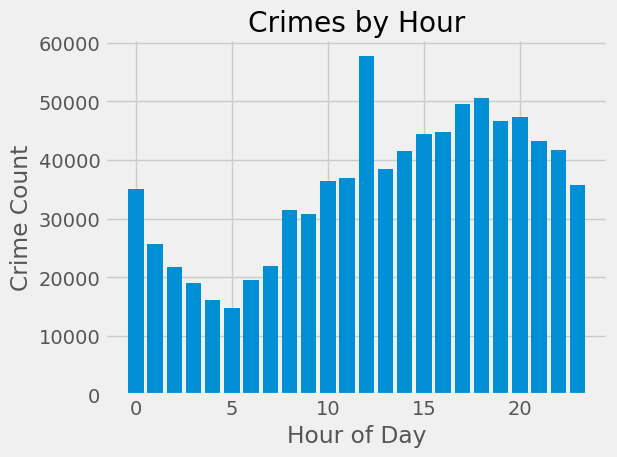

In [426]:
hourly_crime.columns = ['hour', 'count']

plt.bar(hourly_crime['hour'], hourly_crime['count'])
plt.title('Crimes by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.tight_layout()
plt.show()

The chart showing hourly crime distribution was hard to interpret due to overlap, so we isolated noon-hour (12 PM) to better understand what crimes happen most during that time.

**Top crimes reported at 12 PM:**

- **Theft of Identity** – 9,098 reports  
- **Vehicle - Stolen** – 4,048  
- **Battery - Simple Assault** – 3,958  
- **Theft Plain - Petty (< $950)** – 3,785  

This provides insight into common mid-day crimes, with identity theft significantly higher—possibly reflecting reporting behavior more than incident timing.

In [428]:
df[df['date_occurred'].dt.hour == 12]['crime_description'].value_counts().reset_index()

,crime_description,count
0,THEFT OF IDENTITY,9098
1,VEHICLE - STOLEN,4048
2,BATTERY - SIMPLE ASSAULT,3958
3,THEFT PLAIN - PETTY ($950 & UNDER),3785
4,BURGLARY,2945
...,...,...
119,"DRUGS, TO A MINOR",1
120,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",1
121,BIGAMY,1
122,GRAND THEFT / INSURANCE FRAUD,1


### 🧹 Adjusting Hourly Crime Counts by Removing Identity Theft
Identity theft is a crime that often doesn’t occur at a specific time—or at least not one that’s known by the victim at the moment. Including it in hourly crime analysis could skew the results and produce misleading insights.

To create a more accurate hourly crime distribution, we filtered out all rows where the crime_description equals "THEFT OF IDENTITY".

In [430]:
no_identity_theft = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]

In [431]:
new_hourly_count = no_identity_theft = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

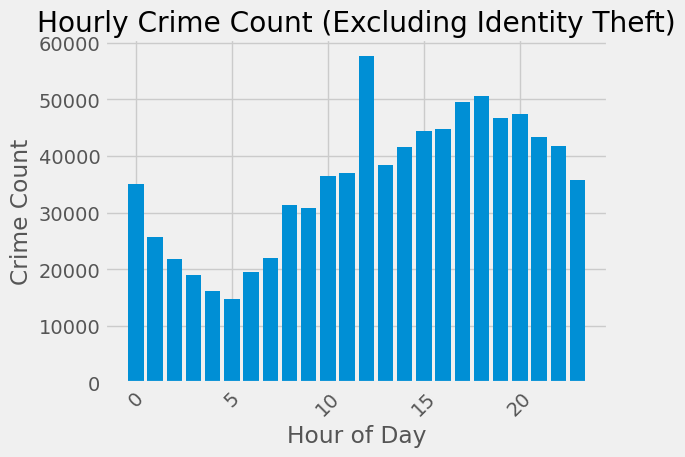

In [432]:
plt.bar(new_hourly_count['date_occurred'], new_hourly_count['count'])
plt.title('Hourly Crime Count (Excluding Identity Theft)')
plt.xlabel('Hour of Day')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [433]:
no_identity_theft = df[df['crime_description'] != 'THEFT OF IDENTITY']
crimes_at_12 = no_identity_theft[no_identity_theft['date_occurred'].dt.hour == 12]
crimes_at_12['crime_description'].value_counts().reset_index()

,crime_description,count
0,VEHICLE - STOLEN,4048
1,BATTERY - SIMPLE ASSAULT,3958
2,THEFT PLAIN - PETTY ($950 & UNDER),3785
3,BURGLARY,2945
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2587
...,...,...
118,"DRUGS, TO A MINOR",1
119,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",1
120,BIGAMY,1
121,GRAND THEFT / INSURANCE FRAUD,1


## 🕛 Midday Crime Patterns (Excluding Identity Theft)
By excluding THEFT OF IDENTITY, we focused on crimes with more precisely known timeframes. At 12 PM, the most frequent reported crimes were:

Vehicle - Stolen: 4,048 occurrences

Battery - Simple Assault: 3,958 occurrences

Theft Plain - Petty ($950 & under): 3,785 occurrences

🔍 These midday crime types suggest that public spaces or parked vehicles may be more vulnerable around noon, a busy part of the day.

## 🧠 Handling Missing Values with SimpleImputer
📌 We used SimpleImputer from sklearn to handle missing categorical values by filling them with the most frequently occurring entry in each column. This is a simple, yet effective way to retain records without deleting rows unnecessarily — especially useful for model preparation.

### 🔍 Checking for Nulls
We start by identifying missing values across all columns to assess which variables require imputation or further cleaning.

In [437]:
print(df.isnull().sum()) #Check for null values

division_number               0
date_reported                 0
date_occurred                 0
area                          0
area_name                     0
reporting_district            0
part                          0
crime_code                    0
crime_description             0
victim_age                    0
victim_sex               112181
victim_descent           112189
premise_code                 10
premise_description         517
status                        0
status_description            0
crime_code_1                 11
location                      0
latitude                      0
longitude                     0
year                          0
month                         0
date_occurred_no_time         0
Time to report                0
dtype: int64


### 🔢 Selecting Numeric Columns
Here, we filter the DataFrame to isolate numeric columns (integers and floats), which are suitable for mean-based imputation.

In [439]:
numeric_cols = df.select_dtypes(include=['number']).columns # Select only numeric columns

In [440]:
print(numeric_cols)

Index(['division_number', 'area', 'reporting_district', 'part', 'crime_code',
       'victim_age', 'premise_code', 'crime_code_1', 'latitude', 'longitude',
       'year', 'month', 'Time to report'],
      dtype='object')


In [441]:
df.dtypes #Double checking for numeric values, like ints and floats

division_number                   int64
date_reported            datetime64[ns]
date_occurred            datetime64[ns]
area                              int64
area_name                        object
reporting_district                int64
part                              int64
crime_code                        int64
crime_description                object
victim_age                        int64
victim_sex                       object
victim_descent                   object
premise_code                    float64
premise_description              object
status                           object
status_description               object
crime_code_1                    float64
location                         object
latitude                        float64
longitude                       float64
year                              int32
month                             int32
date_occurred_no_time            object
Time to report                    int64
dtype: object

### 🧼 Handling Missing Numeric Values with SimpleImputer

We use SimpleImputer from scikit-learn to handle missing numeric values.
The strategy "mean" replaces missing values in each numeric column with that column’s average, a common preprocessing step before analysis or modeling.

In [443]:
imputer = SimpleImputer(strategy = "mean") #Initialize the Imputer with "mean" strategy

In [444]:
df.loc[:, numeric_cols] = imputer.fit_transform(df[numeric_cols]) # Apply the imputer to fill missing values in numeric columns

### ✅ Post-Imputation Check

After imputation, we verify that the numeric columns are now free of nulls. This ensures a clean dataset for any downstream analysis or modeling tasks.

In [446]:
print(df.isnull().sum())

division_number               0
date_reported                 0
date_occurred                 0
area                          0
area_name                     0
reporting_district            0
part                          0
crime_code                    0
crime_description             0
victim_age                    0
victim_sex               112181
victim_descent           112189
premise_code                  0
premise_description         517
status                        0
status_description            0
crime_code_1                  0
location                      0
latitude                      0
longitude                     0
year                          0
month                         0
date_occurred_no_time         0
Time to report                0
dtype: int64


In [447]:
numeric_df = df.select_dtypes(include=['number'])

In [448]:
numeric_df.isnull()

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude,year,month,Time to report
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,False,False,False,False,False,False,False,False,False,False,False,False,False
852946,False,False,False,False,False,False,False,False,False,False,False,False,False
852947,False,False,False,False,False,False,False,False,False,False,False,False,False
852948,False,False,False,False,False,False,False,False,False,False,False,False,False


## 🚨 Anomaly Detection with Isolation Forest
 - We apply the Isolation Forest algorithm to detect unusual or anomalous crime incidents in the dataset. These outliers may represent data entry errors or truly rare events.

We first isolate the numeric portion of the dataset and drop any remaining missing values. Anomaly detection models like Isolation Forest require clean, numerical input data.

In [451]:
numeric_df = df.select_dtypes(include=['number']).dropna()

### 🔧 Initialize the Model
We initialize an Isolation Forest model from scikit-learn, specifying contamination=0.05 to flag approximately 5% of the data as potential anomalies. A fixed random_state ensures reproducibility.

In [453]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

### 🏷️ Predict Anomalies and Add Results to the DataFrame
We apply the model to the numeric dataset and store the predictions in a new anomaly column. In Isolation Forest:

- 1 = normal

- -1 = anomaly



In [455]:
df.loc[:,'anomaly'] = model.fit_predict(numeric_df)

### 📊 Anomaly Counts
We examine how many records were labeled as anomalies versus normal. This helps validate whether the contamination setting behaves as expected.

In [457]:
# In Isolation Forest, -1 means anomaly, 1 means normal
df['anomaly'].value_counts().reset_index()


,anomaly,count
0,1,808834
1,-1,42571


### 🔎 Visualizing Anomalies

We visualize the results using scatter plots, where blue represents normal records and red shows anomalies. These visuals make it easier to identify patterns or clusters of unusual activity.

In [459]:
anomalies = df[df['anomaly'] == -1]  # Filter out the anomalies
anomalies.head(10).reset_index()  # Display some anomaly records
normal_data = df[df['anomaly'] == 1]

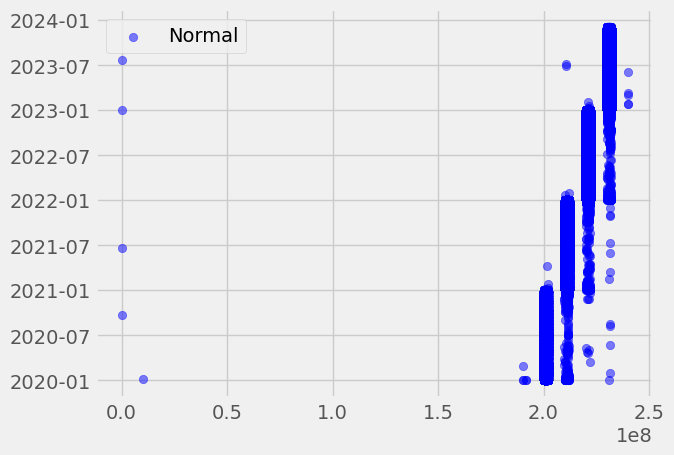

In [460]:
plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], color='blue', label='Normal', alpha=0.5)
plt.legend()
plt.show()


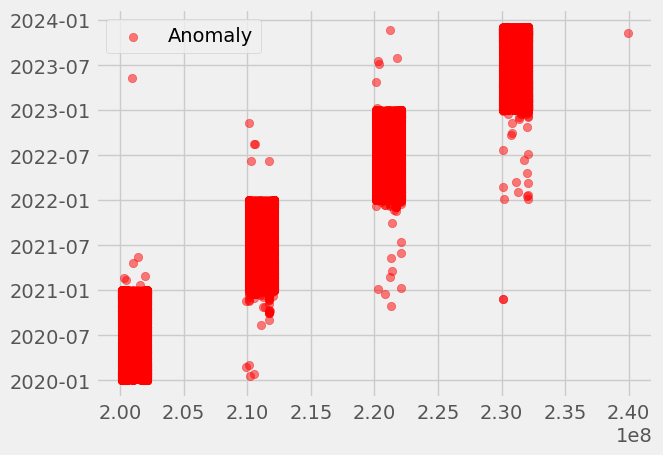

In [461]:
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], color='red', label='Anomaly', alpha=0.5)
plt.legend()
plt.show()

### 🧠 Sample of Detected Anomalies

We display a preview of the top 10 flagged anomalies to better understand the nature of these outliers. This can guide further investigation or validation.



In [462]:
anomalies.head(10)

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,Time to report,anomaly
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61,-1
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,...,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1,2020-01-01,1,-1
7,200100504,2020-01-04,2020-01-04 00:40:00,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,...,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1,2020-01-04,0,-1
11,200100510,2020-01-05,2020-01-05 09:55:00,1,Central,111,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,...,Invest Cont,930.0,800 N ALAMEDA ST,34.0615,-118.2412,2020,1,2020-01-05,0,-1
15,211916029,2021-11-26,2020-11-30 07:30:00,19,Mission,1916,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,24,...,Invest Cont,626.0,14200 BERG ST,34.3055,-118.4439,2020,11,2020-11-30,361,-1
18,210916801,2021-11-22,2020-11-19 12:00:00,9,Van Nuys,932,2,354,THEFT OF IDENTITY,46,...,Invest Cont,354.0,14700 FRIAR ST,34.1857,-118.4574,2020,11,2020-11-19,368,-1
19,200100535,2020-01-14,2020-01-14 13:30:00,1,Central,152,1,210,ROBBERY,66,...,Invest Cont,210.0,7TH,34.0463,-118.2550,2020,1,2020-01-14,0,-1
23,211014725,2021-11-18,2020-12-28 00:01:00,10,West Valley,1045,2,354,THEFT OF IDENTITY,46,...,Invest Cont,354.0,5700 ENFIELD AV,34.1748,-118.5228,2020,12,2020-12-28,325,-1
25,211015072,2021-11-29,2020-11-01 12:00:00,10,West Valley,1043,2,354,THEFT OF IDENTITY,34,...,Invest Cont,354.0,18600 COLLINS ST,34.1745,-118.5383,2020,11,2020-11-01,393,-1
27,200100552,2020-01-19,2020-01-19 20:00:00,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",71,...,Adult Arrest,230.0,ALAMEDA,34.0578,-118.2371,2020,1,2020-01-19,0,-1


### 🧾 Final Summary

In this project, I analyzed the **Los Angeles Crime dataset** to uncover key trends, explore demographic patterns, and detect anomalies using AI techniques. The end-to-end process included:

🔹 **Data Cleaning**  
- Converted date columns for accurate time-based analysis  
- Handled missing values using both manual cleanup and `SimpleImputer`  
- Removed outliers and prepared structured data for modeling  

🔹 **Exploratory Data Analysis (EDA)**  
- Identified seasonal crime trends (monthly/yearly breakdowns)  
- Investigated victim demographics (age distribution, top crime types)  
- Highlighted areas and times with high crime rates  

🔹 **AI & Anomaly Detection**  
- Applied **Isolation Forest** to detect unusual or rare crime events  
- Visualized anomalies using scatter plots for deeper insight  
- Integrated anomaly labels back into the original dataset for future tracking

🔹 **Key Insights**  
- December 2023 showed an artificial drop due to incomplete data  
- 2022 had the highest number of recorded crimes overall  
- Most crimes are reported within 1 day of occurrence  
- Some crime categories, like **crimes against children**, experience long delays in reporting  
- Top recurring crimes at noon were identity theft and vehicle theft  
- Central, 77th Street, and Hollywood were the highest-crime areas at night  
- AI flagged 5% of data entries as anomalies for deeper inspection  

---

### 📌 Tools Used  
- **Python** (Pandas, Matplotlib, Scikit-learn)  
- **Jupyter Notebook**  
- **SimpleImputer, Isolation Forest** for AI application

---

### 📁 Next Steps  
This analysis can be extended by:  
- Adding geospatial mapping (e.g., plotting by district on a map)  
- Applying time series modeling for crime prediction  
- Comparing multiple years of crime trends using external datasets